In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [2]:
# the CSVs "new_DataSet.csv" and "tracks.csv" is made out of the original dataset "spotify dataset.csv" 

data = pd.read_csv(r'new_DataSet.csv')
tracks = pd.read_csv(r'tracks.csv')

### Cleaning Data

In [3]:
data.head()

,track_id,track_name,track_artist_id,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,24150,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,Ed Sheeran,66,8225,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,235,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,3061,Memories - Dillon Francis Remix,6084,Maroon 5,67,17650,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,235,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,7219,All the Time - Don Diablo Remix,10416,Zara Larsson,70,3798,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,235,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,25699,Call You Mine - Keanu Silva Remix,9215,The Chainsmokers,60,5293,Call You Mine - The Remixes,2019-07-19,Pop Remix,235,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,5987,Someone You Loved - Future Humans Remix,5402,Lewis Capaldi,69,21936,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,235,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist_id             0
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
data = data.dropna()
data = data.drop_duplicates()

In [6]:
data = data.drop(['track_name','track_artist','track_album_name','track_album_release_date','playlist_name'],axis=1)

In [7]:
scaler = StandardScaler()
lencoder = LabelEncoder()

data[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']] = scaler.fit_transform(data[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']])
data['playlist_genre'] = lencoder.fit_transform(data['playlist_genre'])
data['playlist_subgenre'] = lencoder.fit_transform(data['playlist_subgenre'])
data['duration_min'] = data['duration_ms']/60000
data = data.drop('duration_ms',axis=1)

### Data Analysis

In [8]:
data.corr()

,track_id,track_artist_id,track_popularity,track_album_id,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
track_id,1.000000,-0.011134,0.018493,-0.010496,0.000606,-0.003946,0.006053,0.007419,-0.023149,-0.006873,-0.003560,-0.008035,-0.002619,0.011683,-0.006064,-0.006747,0.001292,-0.002767,0.006344
track_artist_id,-0.011134,1.000000,0.004749,-0.002061,0.002604,0.041847,-0.015787,-0.023913,0.000916,-0.000345,-0.021715,0.020642,-0.028418,-0.008090,0.021088,0.005232,-0.007580,0.006609,-0.013034
track_popularity,0.018493,0.004749,1.000000,0.000810,-0.001396,0.042504,0.058154,0.064754,-0.108984,-0.000405,0.057717,0.010553,0.007067,0.085042,-0.150003,-0.054593,0.033278,-0.005538,-0.143634
track_album_id,-0.010496,-0.002061,0.000810,1.000000,-0.001816,-0.012905,-0.000316,-0.001659,0.000833,0.006748,0.003023,0.000871,-0.020970,0.009578,0.004640,-0.001002,-0.000051,-0.000520,-0.021007
playlist_id,0.000606,0.002604,-0.001396,-0.001816,1.000000,-0.080828,-0.068822,-0.069647,0.045282,-0.005825,0.026539,0.010543,-0.062778,-0.026954,0.043865,0.016460,-0.042631,0.023429,-0.031644
playlist_genre,-0.003946,0.041847,0.042504,-0.012905,-0.080828,1.000000,-0.123818,-0.182460,-0.190428,-0.007453,-0.243408,0.065467,0.110338,0.094095,-0.170521,-0.009802,0.098402,-0.016692,0.105532
playlist_subgenre,0.006053,-0.015787,0.058154,-0.000316,-0.068822,-0.123818,1.000000,0.168004,-0.118325,0.004892,0.011768,-0.045701,0.091532,0.081176,-0.095358,-0.041184,0.034773,-0.023142,0.001077
danceability,0.007419,-0.023913,0.064754,-0.001659,-0.069647,-0.182460,0.168004,1.000000,-0.086074,0.011771,0.025351,-0.058711,0.181808,-0.024515,-0.008658,-0.123899,0.330538,-0.184132,-0.096922
energy,-0.023149,0.000916,-0.108984,0.000833,0.045282,-0.190428,-0.118325,-0.086074,1.000000,0.009972,0.676662,-0.004778,-0.032184,-0.539732,0.033282,0.161317,0.151050,0.150072,0.012560
key,-0.006873,-0.000345,-0.000405,0.006748,-0.005825,-0.007453,0.004892,0.011771,0.009972,1.000000,0.000920,-0.173981,0.022462,0.004378,0.006022,0.002834,0.019933,-0.013316,0.015141


In [9]:
data.describe()

,track_id,track_artist_id,track_popularity,track_album_id,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,3.282800e+04,32828.000000
mean,14214.710978,5298.133484,42.483551,11245.841903,233.698184,2.442640,11.601529,2.792129e-16,1.112523e-16,3.016690e-18,1.233731e-17,-1.119287e-16,2.618974e-17,-7.900210e-17,2.921996e-17,1.348447e-16,-3.447955e-16,5.927863e-16,3.763280
std,8193.574293,3103.686069,24.980476,6503.916318,135.798423,1.708802,6.794681,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.997275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.513422e+00,-3.860570e+00,-1.488003e+00,-1.329336e+01,-1.141381e+00,-1.056740e+00,-7.983550e-01,-3.779849e-01,-1.232418e+00,-2.189836e+00,-4.493277e+00,0.066667
25%,7113.750000,2581.750000,24.000000,5607.750000,112.000000,1.000000,6.000000,-6.330600e-01,-6.500504e-01,-9.342194e-01,-4.857537e-01,-1.141381e+00,-6.520234e-01,-7.296064e-01,-3.779849e-01,-6.316822e-01,-7.701370e-01,-7.777002e-01,3.130075
50%,14211.500000,5267.500000,45.000000,11232.500000,239.000000,2.000000,11.000000,1.182002e-01,1.238019e-01,1.733485e-01,1.852138e-01,8.761319e-01,-4.397938e-01,-4.323032e-01,-3.779131e-01,-4.094036e-01,6.194004e-03,4.090062e-02,3.600000
75%,21341.250000,7977.000000,62.000000,16828.250000,349.000000,4.000000,18.000000,7.316145e-01,7.815764e-01,1.004024e+00,6.941486e-01,8.761319e-01,2.462508e-01,3.626302e-01,-3.564456e-01,3.747280e-01,7.825250e-01,4.844999e-01,4.226354
max,28355.000000,10691.000000,100.000000,22544.000000,470.000000,5.000000,23.000000,2.261704e+00,1.665979e+00,1.557808e+00,2.675012e+00,8.761319e-01,8.004971e+00,3.727211e+00,4.054738e+00,5.222087e+00,2.060683e+00,4.406772e+00,8.630167


#### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

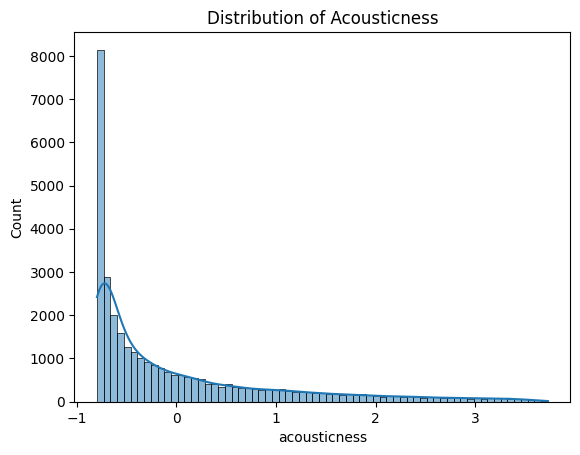

In [10]:
sns.histplot(data['acousticness'],kde=True)
plt.title('Distribution of Acousticness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

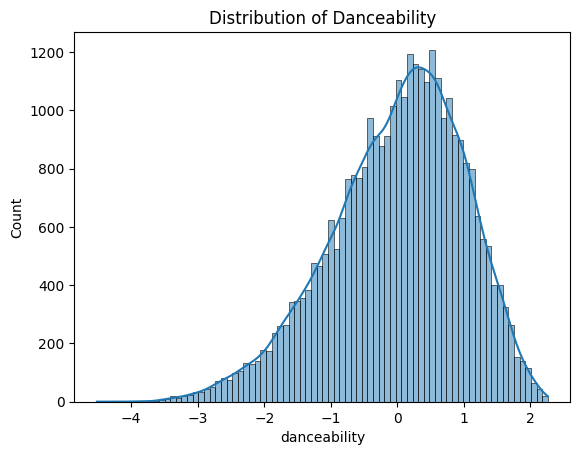

In [11]:
sns.histplot(data['danceability'],kde=True)
plt.title('Distribution of Danceability')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

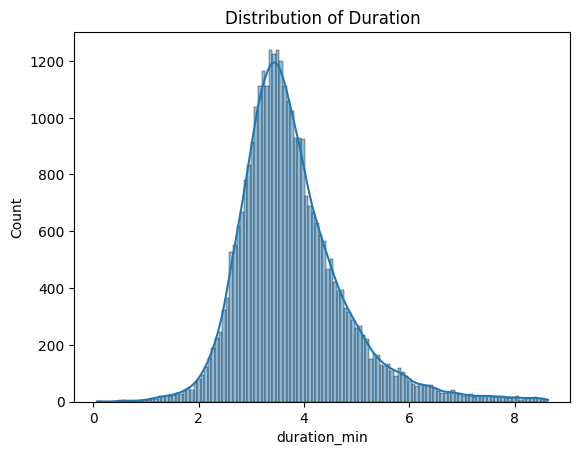

In [12]:
sns.histplot(data['duration_min'],kde=True)
plt.title('Distribution of Duration')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

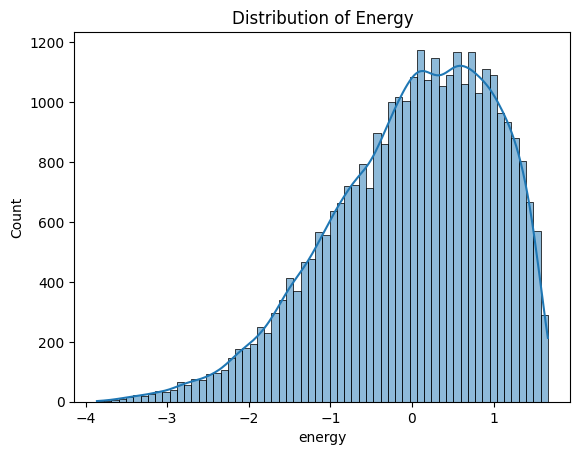

In [13]:
sns.histplot(data['energy'],kde=True)
plt.title('Distribution of Energy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

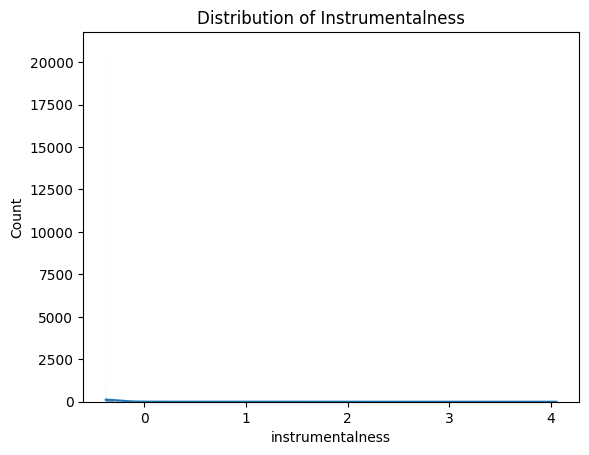

In [14]:
sns.histplot(data['instrumentalness'],kde=True)
plt.title('Distribution of Instrumentalness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

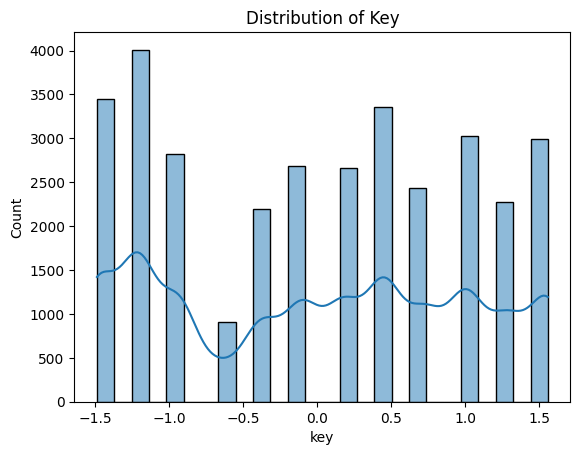

In [15]:
sns.histplot(data['key'],kde=True)
plt.title('Distribution of Key')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

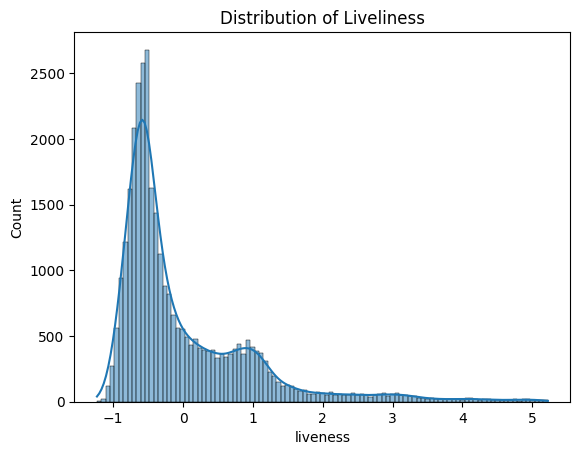

In [16]:
sns.histplot(data['liveness'],kde=True)
plt.title('Distribution of Liveliness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

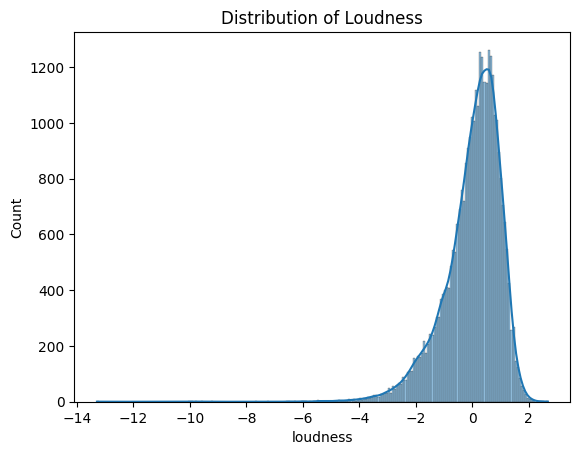

In [17]:
sns.histplot(data['loudness'],kde=True)
plt.title('Distribution of Loudness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

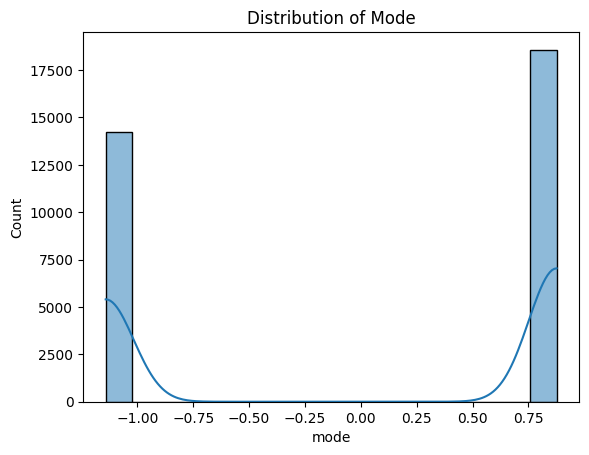

In [18]:
sns.histplot(data['mode'],kde=True)
plt.title('Distribution of Mode')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

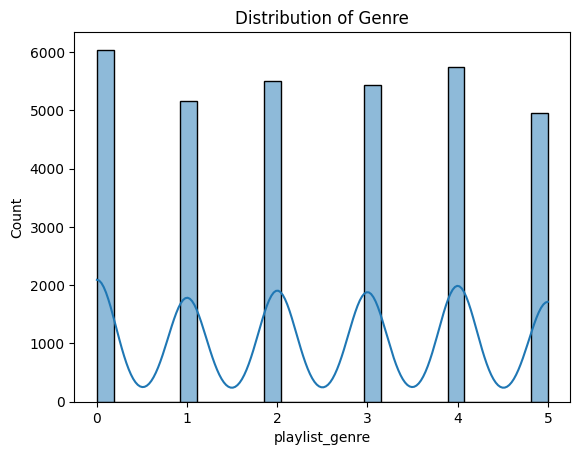

In [19]:
sns.histplot(data['playlist_genre'],kde=True)
plt.title('Distribution of Genre')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

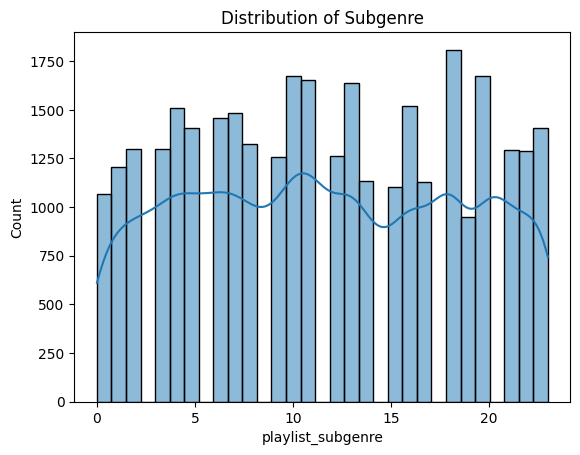

In [20]:
sns.histplot(data['playlist_subgenre'],kde=True)
plt.title('Distribution of Subgenre')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

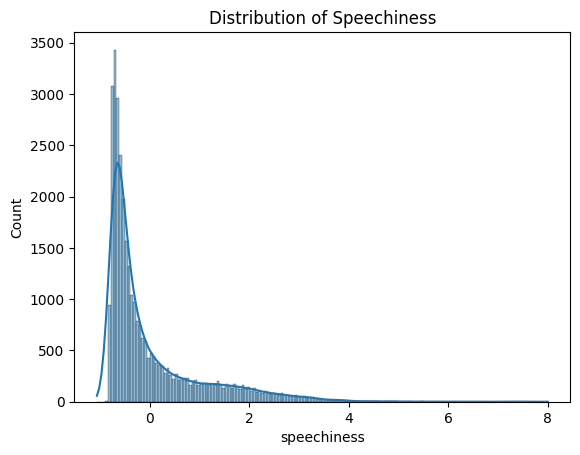

In [21]:
sns.histplot(data['speechiness'],kde=True)
plt.title('Distribution of Speechiness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

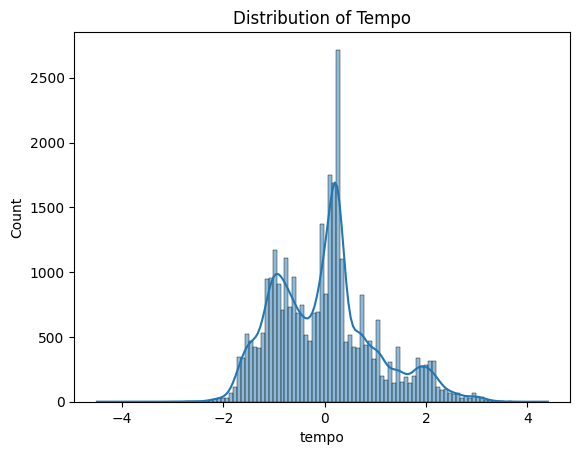

In [22]:
sns.histplot(data['tempo'],kde=True)
plt.title('Distribution of Tempo')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

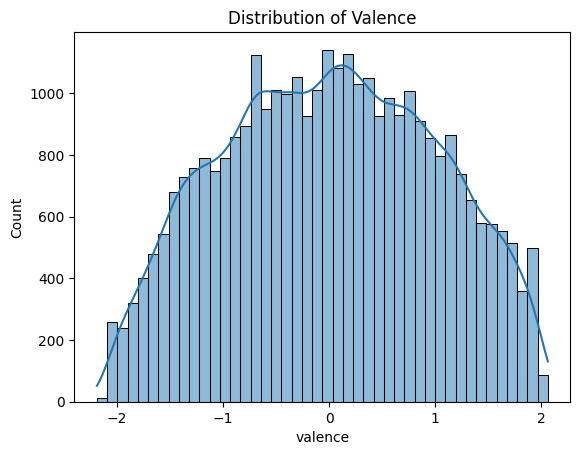

In [23]:
sns.histplot(data['valence'],kde=True)
plt.title('Distribution of Valence')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

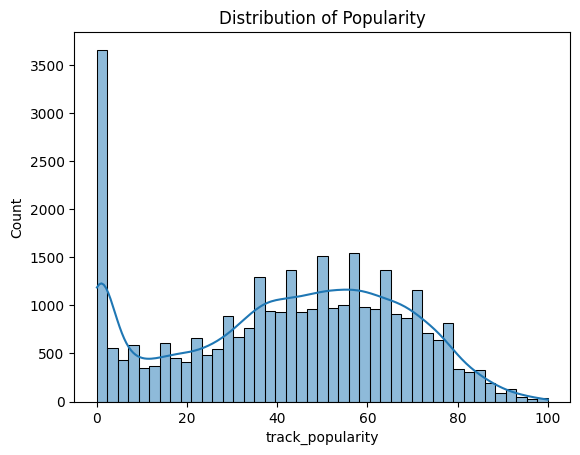

In [24]:
sns.histplot(data['track_popularity'],kde=True)
plt.title('Distribution of Popularity')
plt.show

#### Correlation Matrix

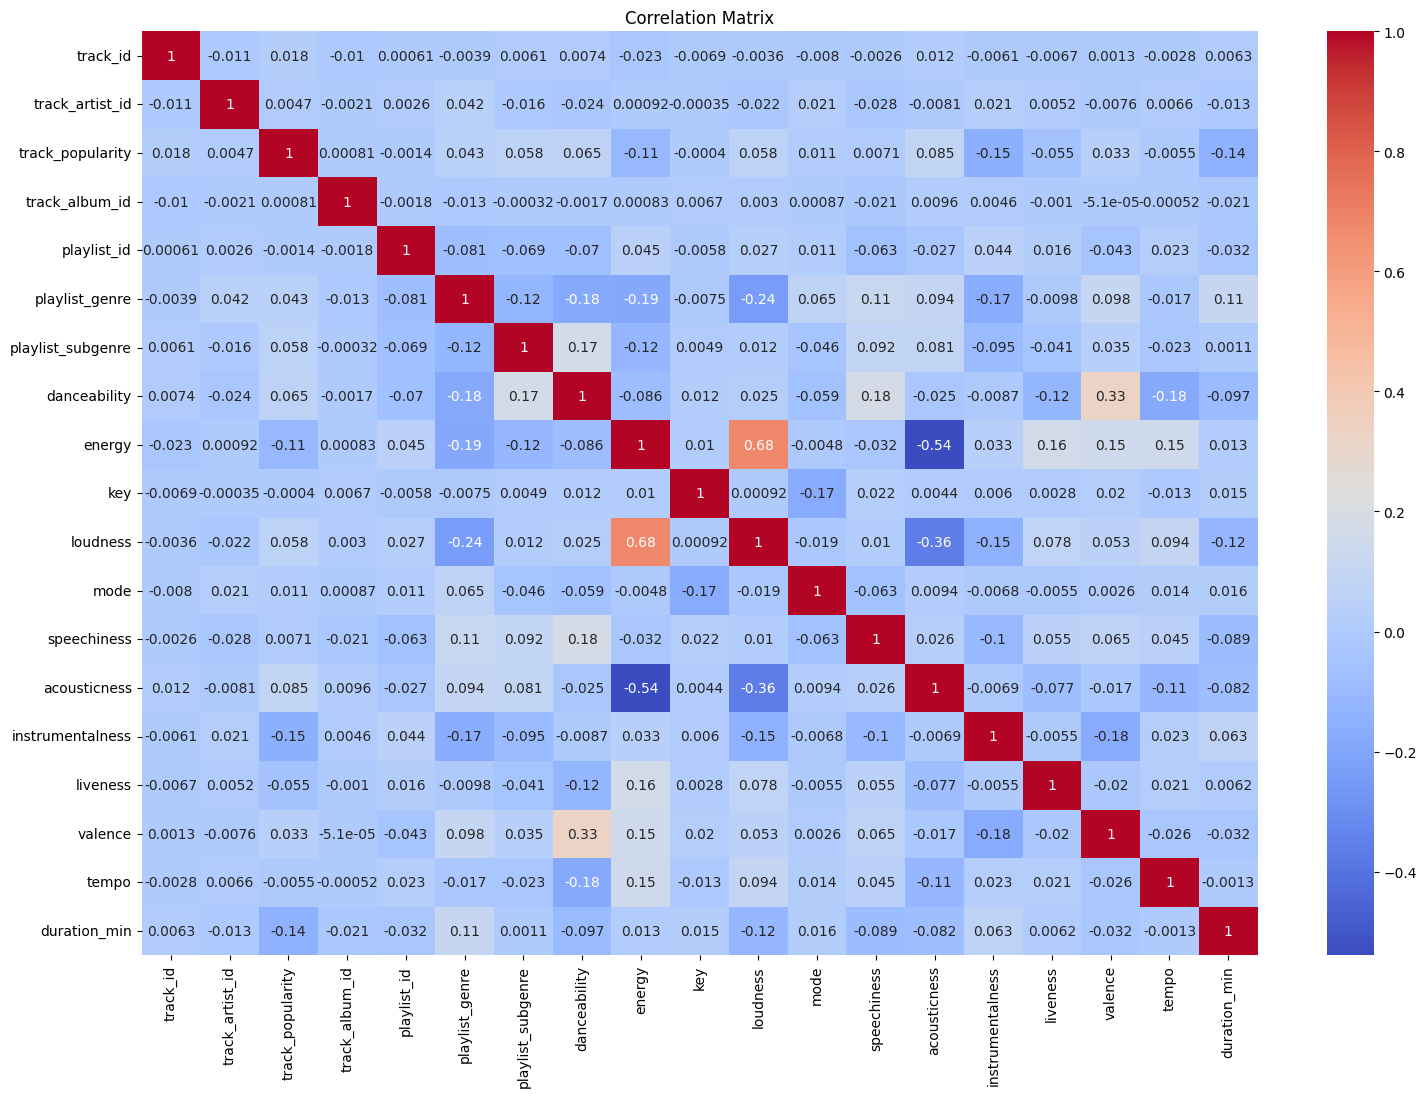

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Pair Plot

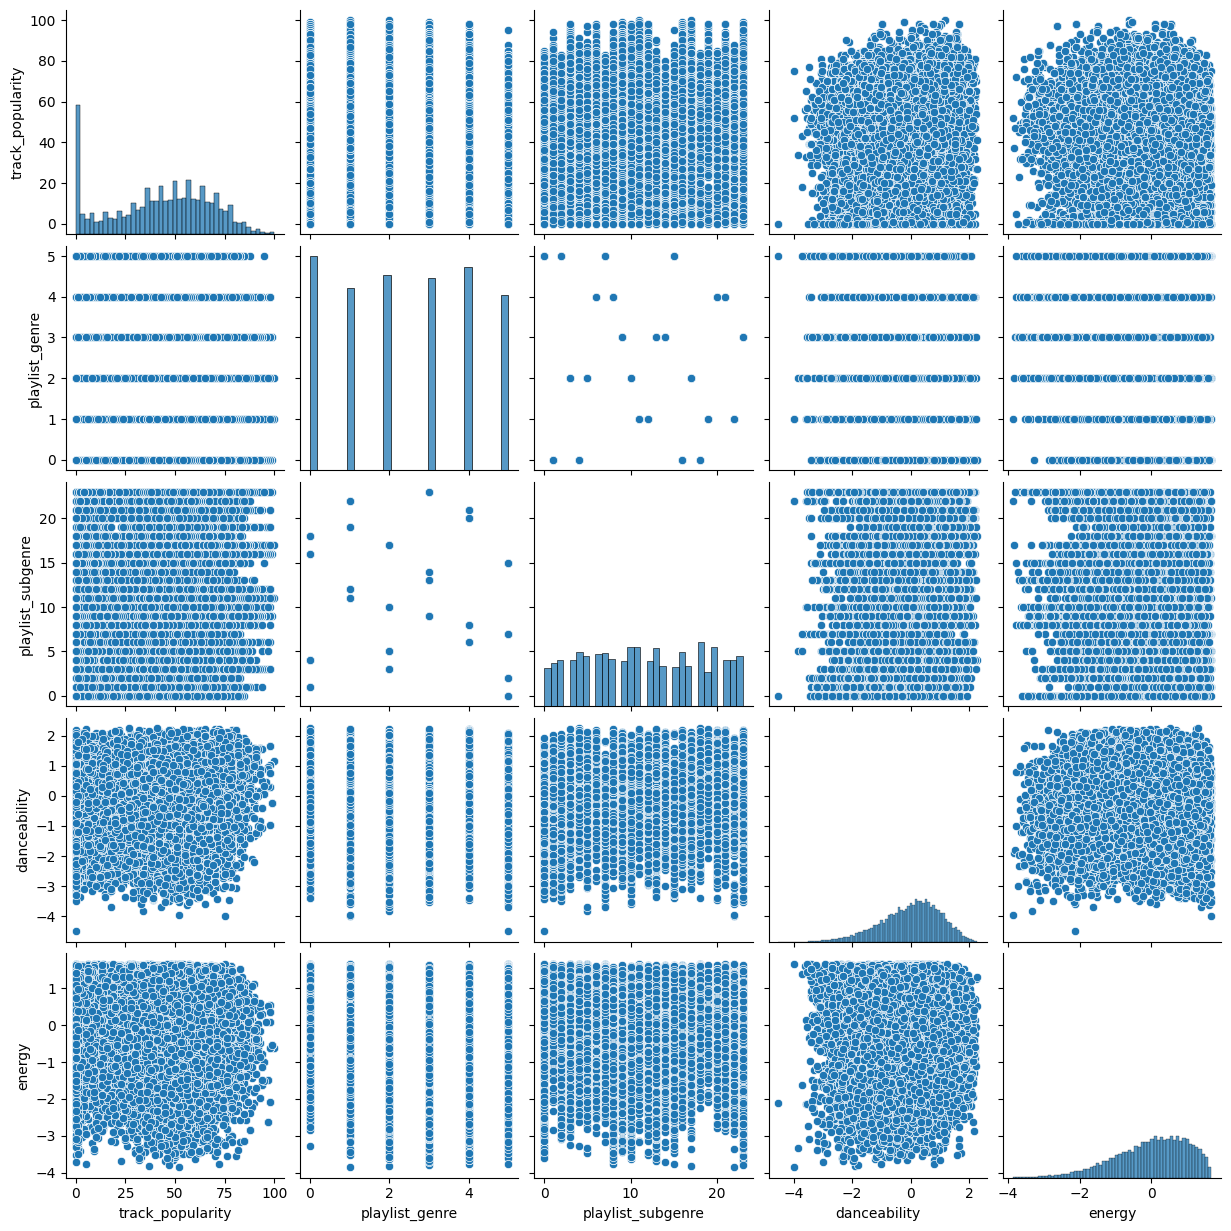

In [26]:
sns.pairplot(data[['track_popularity','playlist_genre','playlist_subgenre','danceability','energy']])
plt.show()

### Clustering - KMeans

In [27]:
features = data[['track_popularity','playlist_genre','playlist_subgenre','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
kmeans = KMeans(n_clusters=100)
kmeans.fit(features)
data['clusters'] = kmeans.labels_

<function matplotlib.pyplot.show(close=None, block=None)>

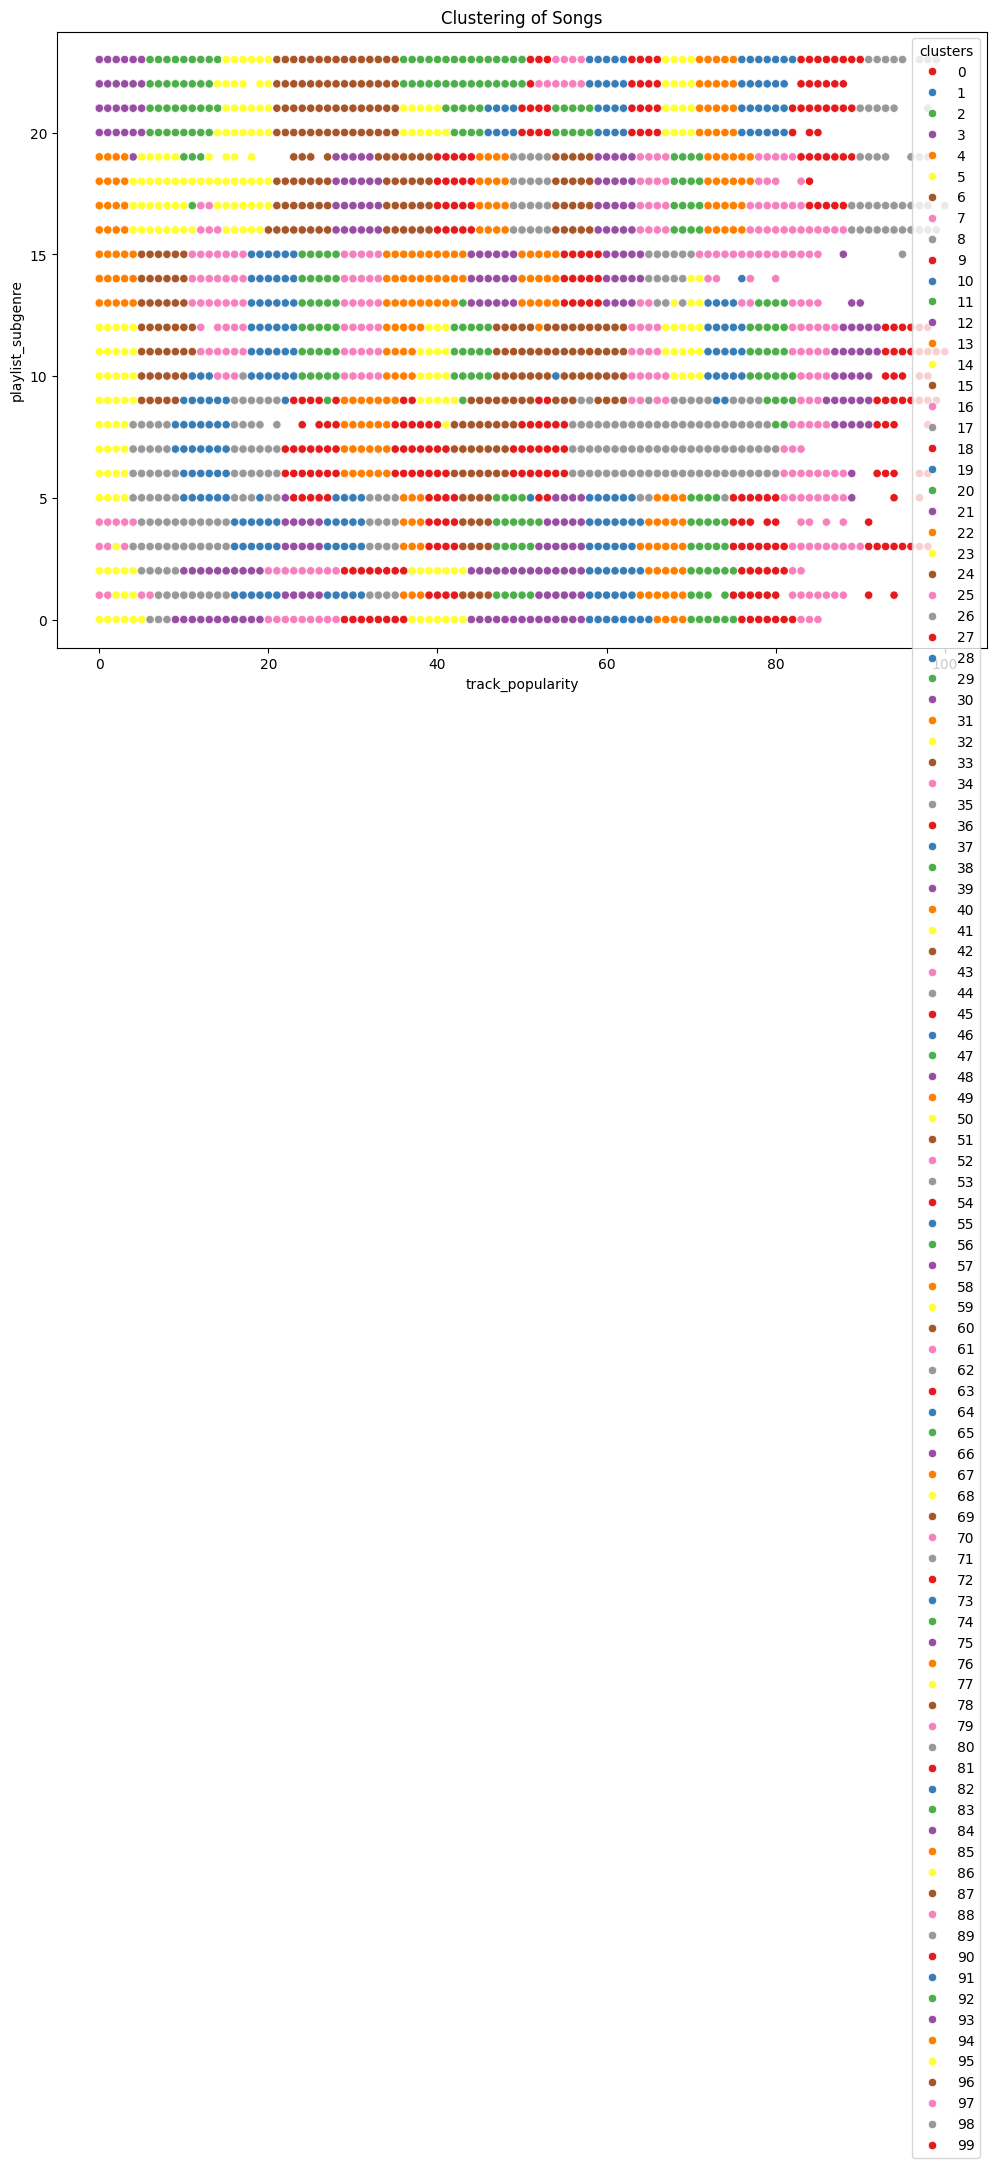

In [28]:
# Visualize Clusters
plt.figure(figsize=(12,8))
sns.scatterplot(x='track_popularity',y='playlist_subgenre',hue='clusters',data=data,palette='Set1')
plt.title('Clustering of Songs')
plt.show

### Filtering

In [29]:
similaritymatrix = cosine_similarity(data[['track_popularity','playlist_genre','playlist_subgenre','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','clusters']])
similaritymatrix

array([[1.        , 0.99920706, 0.96340522, ..., 0.61367852, 0.63194743,
        0.74270858],
       [0.99920706, 1.        , 0.96139742, ..., 0.60991961, 0.62812755,
        0.7409163 ],
       [0.96340522, 0.96139742, 1.        , ..., 0.76499139, 0.77785278,
        0.8712196 ],
       ...,
       [0.61367852, 0.60991961, 0.76499139, ..., 1.        , 0.99688507,
        0.97740226],
       [0.63194743, 0.62812755, 0.77785278, ..., 0.99688507, 1.        ,
        0.98235948],
       [0.74270858, 0.7409163 , 0.8712196 , ..., 0.97740226, 0.98235948,
        1.        ]])

In [30]:
def recommend_song(track_id, similaritymatrix, data, top_n=5):

    print("You asked for song:-")
    print(data.loc[track_id, 'track_name'])
    idx = data.index[data['track_id'] == track_id][0]
    sim_score = list(enumerate(similaritymatrix[idx]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    sim_score = sim_score[1:top_n+1]
    song_indices = [i[0] for i in sim_score]

    return data.iloc[song_indices]

In [31]:
recommend_song(12122,similaritymatrix,tracks)

You asked for song:-
Sheer Heart Attack - Remastered 2011


,track_id,track_name,track_artist_id,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
1325,1637,Sunflower - Spider-Man: Into the Spider-Verse,7494,Post Malone,87,13626,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,295,pop,post-teen pop
1731,26040,Closer (feat. Halsey),9215,The Chainsmokers,85,2550,Closer (feat. Halsey),2016-07-29,Post pop teen,93,pop,post-teen pop
1436,26391,Rare,8333,Selena Gomez,88,10400,Rare,2020-01-10,The Sound of Post-Teen Pop,56,pop,post-teen pop
2317,27782,Shape of You,2782,Ed Sheeran,86,10127,÷ (Deluxe),2017-03-03,post teen pop,435,pop,post-teen pop
1397,10989,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",5332,Lauv,84,17524,"fuck, i'm lonely (with Anne-Marie) (from “13 R...",2019-08-02,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,295,pop,post-teen pop


In [32]:
data.head()

,track_id,track_artist_id,track_popularity,track_album_id,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,clusters
0,24150,2782,66,8225,235,2,3,0.642015,1.201668,0.173348,1.367040,0.876132,-0.481253,-0.333961,-0.377985,-0.809246,0.031929,0.042833,3.245900,22
1,3061,6084,67,17650,235,2,3,0.490384,0.643388,1.557808,0.585736,0.876132,-0.688547,-0.468726,-0.359210,1.081094,0.782525,-0.777291,2.710000,22
2,7219,10416,70,3798,235,2,3,0.138877,1.284580,-1.211111,1.100025,-1.141381,-0.324301,-0.436856,-0.377881,-0.519571,0.439395,0.116133,2.943600,47
3,25699,9215,60,5293,235,2,3,0.435246,1.279053,0.450240,0.984251,0.876132,-0.049884,-0.667687,-0.377943,0.089589,-1.001750,0.039860,2.818217,28
4,5987,5402,69,21936,235,2,3,-0.033430,0.742884,-1.211111,0.685114,0.876132,-0.702366,-0.432758,-0.377985,-0.692598,0.919777,0.114944,3.150867,22


In [33]:
data.to_csv("finalDataset.csv",index=False)

In [34]:
import pickle

with open('similarity.pkl', 'wb') as file:
    pickle.dump(similaritymatrix, file)